# 🧠 10.5 — Laboratorio Final: Análisis y Clasificación de Textos

En este laboratorio integraremos todo lo aprendido sobre procesamiento de texto y machine learning:

1️⃣ Preprocesado de textos (limpieza y stopwords)
2️⃣ Vectorización TF-IDF
3️⃣ Clasificación supervisada con Naive Bayes
4️⃣ Agrupamiento no supervisado con KMeans
5️⃣ Comparación de resultados visuales

In [1]:
# 🚀 Instalación y librerías necesarias
try:
    import nltk
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install nltk scikit-learn matplotlib pandas
    import nltk, pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stop_words_es = stopwords.words('spanish')

print('✅ Librerías cargadas correctamente.')

✅ Librerías cargadas correctamente.


## 1️⃣ Dataset de ejemplo
Creamos un pequeño dataset con frases etiquetadas según su temática.

In [2]:
datos = {
    'texto': [
        'El Real Madrid gana otro partido importante',
        'El Barça ficha a una nueva estrella del fútbol',
        'Los jugadores entrenan para mejorar su rendimiento',
        'Nuevos avances en vacunas y tratamientos',
        'La inteligencia artificial revoluciona la medicina',
        'Los médicos usan algoritmos para diagnosticar enfermedades',
        'La tecnología 5G cambiará la conectividad global',
        'Python y la ciencia de datos dominan el mercado laboral',
        'Los investigadores descubren una terapia innovadora',
        'El ciclismo mejora la salud cardiovascular',
        'Un nuevo teléfono inteligente llega al mercado',
        'El atletismo español logra grandes resultados',
        'Los hospitales invierten en robots quirúrgicos',
        'El tenis femenino bate récords de audiencia'
    ],
    'categoria': [
        'deporte', 'deporte', 'deporte',
        'salud', 'salud', 'salud',
        'tecnología', 'tecnología', 'salud',
        'salud', 'tecnología', 'deporte',
        'salud', 'deporte'
    ]
}

df = pd.DataFrame(datos)
print('📊 Dataset creado:')
df.head()

📊 Dataset creado:


,texto,categoria
0,El Real Madrid gana otro partido importante,deporte
1,El Barça ficha a una nueva estrella del fútbol,deporte
2,Los jugadores entrenan para mejorar su rendimi...,deporte
3,Nuevos avances en vacunas y tratamientos,salud
4,La inteligencia artificial revoluciona la medi...,salud


## 2️⃣ Vectorización TF-IDF
Convertimos los textos en vectores numéricos, eliminando palabras vacías (stopwords) en español.

In [3]:
vectorizador = TfidfVectorizer(stop_words=stop_words_es)
X = vectorizador.fit_transform(df['texto'])
y = df['categoria']

print(f'✅ Matriz TF-IDF generada con {X.shape[0]} documentos y {X.shape[1]} términos.')

✅ Matriz TF-IDF generada con 14 documentos y 64 términos.


## 3️⃣ Clasificación Supervisada — Naive Bayes
Entrenamos un modelo para predecir la categoría de cada texto.

🎯 Precisión del modelo supervisado: 0.33


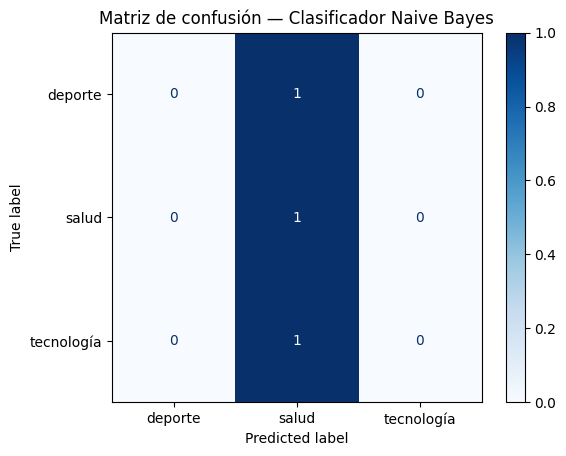

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)
y_pred = modelo_nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'🎯 Precisión del modelo supervisado: {acc:.2f}')

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=modelo_nb.classes_).plot(cmap='Blues')
plt.title('Matriz de confusión — Clasificador Naive Bayes')
plt.show()

## 4️⃣ Agrupamiento No Supervisado — KMeans
Agrupamos los textos sin usar etiquetas conocidas.

In [5]:
modelo_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
modelo_kmeans.fit(X)
df['cluster'] = modelo_kmeans.labels_

print('📌 Asignación de clústeres:')
print(df[['texto', 'categoria', 'cluster']].head(10))

📌 Asignación de clústeres:
                                               texto   categoria  cluster
0        El Real Madrid gana otro partido importante     deporte        0
1     El Barça ficha a una nueva estrella del fútbol     deporte        2
2  Los jugadores entrenan para mejorar su rendimi...     deporte        0
3           Nuevos avances en vacunas y tratamientos       salud        0
4  La inteligencia artificial revoluciona la medi...       salud        0
5  Los médicos usan algoritmos para diagnosticar ...       salud        0
6   La tecnología 5G cambiará la conectividad global  tecnología        0
7  Python y la ciencia de datos dominan el mercad...  tecnología        1
8  Los investigadores descubren una terapia innov...       salud        0
9         El ciclismo mejora la salud cardiovascular       salud        0


## 5️⃣ Comparación visual de ambos enfoques
Visualizamos la distribución de categorías reales frente a los clústeres encontrados por KMeans.

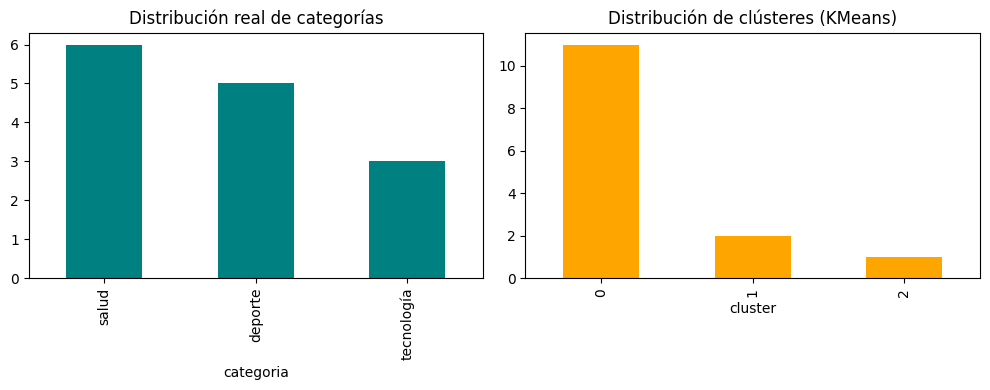

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df['categoria'].value_counts().plot(kind='bar', ax=ax[0], color='teal', title='Distribución real de categorías')
df['cluster'].value_counts().plot(kind='bar', ax=ax[1], color='orange', title='Distribución de clústeres (KMeans)')
plt.tight_layout()
plt.show()

## 💡 Ejercicio final
Añade nuevas frases sin categoría y observa a qué clúster las asigna el modelo KMeans.

In [7]:
nuevos_textos = [
    'El nuevo chip de inteligencia artificial es más rápido que nunca',
    'El jugador anota un gol decisivo en la final',
    'Una nueva vacuna promete inmunidad total'
]

X_nuevos = vectorizador.transform(nuevos_textos)
pred_clusters = modelo_kmeans.predict(X_nuevos)

for texto, cluster in zip(nuevos_textos, pred_clusters):
    print(f'🧩 Texto: "{texto}" → Cluster {cluster}')

🧩 Texto: "El nuevo chip de inteligencia artificial es más rápido que nunca" → Cluster 0
🧩 Texto: "El jugador anota un gol decisivo en la final" → Cluster 0
🧩 Texto: "Una nueva vacuna promete inmunidad total" → Cluster 0


---
✅ **Fin del laboratorio 10.5 – Clasificación y Agrupamiento de Textos**

En este laboratorio el alumno:
- Entrena y evalúa un clasificador supervisado (Naive Bayes)
- Aplica un modelo no supervisado (KMeans) para descubrir temas ocultos
- Compara cómo ambos enfoques interpretan los mismos datos